# KelvinSphere Benchmark
Based on DM's notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from alma import *
import mpmath as mp
from time import time

In [2]:
def get_timer(st=None):
    if st is not None:
        print('Elapsed time: {}s'.format(np.round(time() - st, 2)))
        return
    else:
        return time()

In [3]:
parallel = None

if type(parallel) == bool:
    print('working')

## Testing with planet profile model

In [4]:
model = read_model_pp('EuropaProfile_Seawater_35.2ppt_Tb268.305K.txt')

### SERIAL

In [5]:
st = get_timer()

# Initialize
ndigits = 128
Gnwt, iota = initialize(ndigits)

# Define the KS model
a   = 6371e3
rho = 5.514e3
mu  = 1.46e11
eta = 1e21

r_in = ['3480e3', '6371e3']
rho_in = [ '5.514e3', '5.514e3' ]
mu_in = [ '1.46e11', '1.46e11' ]
eta_in = [ '1e21', '1e21' ]
rheology = ['maxwell', 'maxwell']
params = [[0,0], [0,0]]

model_params = build_model(r_in, rho_in, mu_in, eta_in, rheology, params, ndigits=128, verbose=True)

get_timer(st)

> Initializing
  >> Setting precision: 128
> Building model
  >> Parsing Rheology
  >> Computing mass of the planet
  >> Computing gravity at the interface boundaries
  >> Normalizing model parameters
Elapsed time: 0.0s


### PARALLEL

In [6]:
st = get_timer()

# Initialize
ndigits = 128
Gnwt, iota = initialize(ndigits)

# Define the KS model
a   = 6371e3
rho = 5.514e3
mu  = 1.46e11
eta = 1e21

r_in = ['3480e3', '6371e3']
rho_in = [ '5.514e3', '5.514e3' ]
mu_in = [ '1.46e11', '1.46e11' ]
eta_in = [ '1e21', '1e21' ]
rheology = ['maxwell', 'maxwell']
params = [[0,0], [0,0]]

model_params = build_model(r_in, rho_in, mu_in, eta_in, rheology, params, ndigits=128, verbose=True, parallel=True)

get_timer(st)

> Initializing
  >> Setting precision: 128
> Building model
  >> Parsing Rheology
  >> Computing mass of the planet
  >> Computing gravity at the interface boundaries
  >> Normalizing model parameters
Elapsed time: 0.21s


In [7]:
# Set up ALMA parameters
n = 2
loadtype='tidal'
loadfcn='step'
tau=0
order=8

t = np.logspace(-5,5,101)

#### SERIAL

In [8]:
st = get_timer()

# Tidal LNs, their derivatives, and frequency dependent LNs
output='real'
h2, l2, k2 = love_numbers([ n ], t, loadtype, loadfcn, tau, model_params, output, order, verbose=True)

output='rate'
dh2, dl2, dk2 = love_numbers([ n ], t, loadtype, loadfcn, tau, model_params, output, order, verbose=True)

output='complex'
hc2, lc2, kc2 = love_numbers([ n ], t, loadtype, loadfcn, tau, model_params, output, order, verbose=True)

get_timer(st)

> Computing Salzer weights
> Computing Love Numbers - Serial
   >> processing 1 of 1
Harmonic degree n = 2 (1.37 s)
> Computing Salzer weights
> Computing Love Numbers - Serial
   >> processing 1 of 1
Harmonic degree n = 2 (1.36 s)
> Computing Salzer weights
> Computing Love Numbers - Serial
   >> processing 1 of 1
Harmonic degree n = 2 (0.14 s)
Elapsed time: 2.88s


In [9]:
h2

array([[0.49800167, 0.49800643, 0.49801242, 0.49801996, 0.49802945,
        0.4980414 , 0.49805645, 0.49807539, 0.49809923, 0.49812924,
        0.49816703, 0.4982146 , 0.49827449, 0.49834987, 0.49844478,
        0.49856425, 0.49871464, 0.49890396, 0.49914227, 0.49944225,
        0.49981984, 0.50029509, 0.50089324, 0.501646  , 0.50259328,
        0.50378519, 0.5052847 , 0.50717087, 0.50954289, 0.51252507,
        0.51627306, 0.52098144, 0.52689307, 0.53431025, 0.54360831,
        0.55525135, 0.5698106 , 0.58798473, 0.61062147, 0.63873876,
        0.67354212, 0.71643311, 0.7690004 , 0.83298134, 0.91017678,
        1.00229763, 1.11071933, 1.23612448, 1.37803198, 1.53425151,
        1.70037334, 1.86950071, 2.03252272, 2.17922688, 2.30034031,
        2.39008295, 2.44816359, 2.4798937 , 2.49390158, 2.49862108,
        2.49975636, 2.49995978, 2.50000939, 2.50002117, 2.50001138,
        2.49999971, 2.49999539, 2.49999635, 2.49999846, 2.49999981,
        2.50000028, 2.5000003 , 2.50000019, 2.50

#### PARALLEL

In [10]:
st = get_timer()

# Tidal LNs, their derivatives, and frequency dependent LNs
output='real'
h2, l2, k2 = love_numbers([ n ], t, loadtype, loadfcn, tau, model_params, output, order, verbose=True, parallel=True)

output='rate'
dh2, dl2, dk2 = love_numbers([ n ], t, loadtype, loadfcn, tau, model_params, output, order, verbose=True, parallel=True)

output='complex'
hc2, lc2, kc2 = love_numbers([ n ], t, loadtype, loadfcn, tau, model_params, output, order, verbose=True, parallel=True)

get_timer(st)

> Computing Salzer weights
> Computing Love Numbers - Parallel


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


  >> Clearing spawned threads.
> Computing Salzer weights
> Computing Love Numbers - Parallel


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


  >> Clearing spawned threads.
> Computing Salzer weights
> Computing Love Numbers - Parallel
  >> Clearing spawned threads.
Elapsed time: 2.92s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


In [11]:
h2

array([[0.49800167, 0.49800643, 0.49801242, 0.49801996, 0.49802945,
        0.4980414 , 0.49805645, 0.49807539, 0.49809923, 0.49812924,
        0.49816703, 0.4982146 , 0.49827449, 0.49834987, 0.49844478,
        0.49856425, 0.49871464, 0.49890396, 0.49914227, 0.49944225,
        0.49981984, 0.50029509, 0.50089324, 0.501646  , 0.50259328,
        0.50378519, 0.5052847 , 0.50717087, 0.50954289, 0.51252507,
        0.51627306, 0.52098144, 0.52689307, 0.53431025, 0.54360831,
        0.55525135, 0.5698106 , 0.58798473, 0.61062147, 0.63873876,
        0.67354212, 0.71643311, 0.7690004 , 0.83298134, 0.91017678,
        1.00229763, 1.11071933, 1.23612448, 1.37803198, 1.53425151,
        1.70037334, 1.86950071, 2.03252272, 2.17922688, 2.30034031,
        2.39008295, 2.44816359, 2.4798937 , 2.49390158, 2.49862108,
        2.49975636, 2.49995978, 2.50000939, 2.50002117, 2.50001138,
        2.49999971, 2.49999539, 2.49999635, 2.49999846, 2.49999981,
        2.50000028, 2.5000003 , 2.50000019, 2.50

In [12]:
h2[0, 0]

0.49800167491308495

# Test with new implementation

In [13]:
# analytical results

t_ref = np.copy(t)
kyr2s = 1000 * 365.25 * 24 * 3600

pi = np.pi
G  = 6.67e-11
g  = G * (4/3)*pi*a*rho

gamma = (19/2) * mu/(rho*g*a)

tau  = eta/mu
taup = (1+gamma)*tau

hf = 5/2
kf = 3/2

ln_ref = 1 / (1+gamma) * ( 1 + gamma * (1-np.exp(-t_ref*kyr2s/taup)) )

h2_ref = hf * ln_ref
k2_ref = kf * ln_ref

dln_ref = 1 / (1+gamma) * (1/tau - 1/taup) * np.exp(-t_ref*kyr2s/taup)

dh2_ref = hf * dln_ref * kyr2s
dk2_ref = kf * dln_ref * kyr2s
gamma
omega = 2*pi/(t_ref*kyr2s)
phi_ref = np.arctan( (gamma*omega*tau) / (1+omega**2*tau*taup) )
q_ref = np.sqrt( 1 + (1/gamma**2) * (omega*taup + 1/(omega*tau))**2 )

lnr_ref = 1/(1+gamma) * (1 + gamma/(1+(omega*taup)**2))
lni_ref = - 1/(1+gamma) * gamma * (omega*taup) / (1+(omega*taup)**2)

h2r_ref = hf * lnr_ref
h2i_ref = hf * lni_ref

k2r_ref = kf * lnr_ref
k2i_ref = kf * lni_ref

(0.0, 2.5)

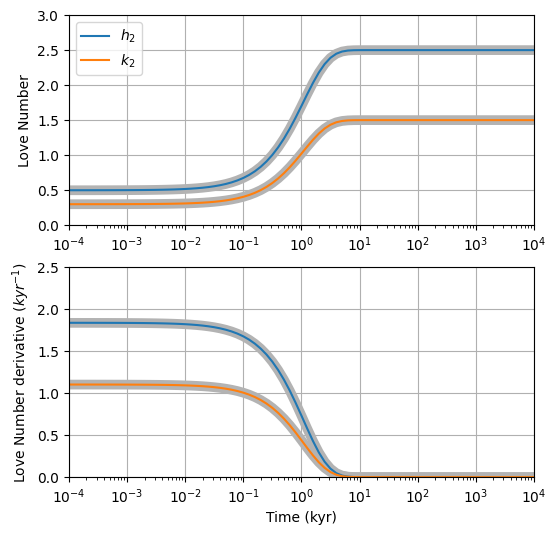

In [14]:
# Plot LNs vs time and their derivatives for a stepwise tidal load
# and compare them with reference LNs from analytical formulas
# for the Kelvin Sphere

c_ref=[0.7,0.7,0.7]
lw_ref=7

fig, (ax1, ax2) = plt.subplots(2, figsize=(6,6))

ax1.semilogx(t_ref, h2_ref, color=c_ref, linewidth=lw_ref)
ax1.semilogx(t_ref, k2_ref, color=c_ref, linewidth=lw_ref)
ax1.semilogx(t, h2[0,:], label='$h_2$')
ax1.semilogx(t, k2[0,:], label='$k_2$')
ax1.set_xlim(1e-4, 1e4)
ax1.grid()
ax1.legend()
ax1.set_ylabel('Love Number')
ax1.set_ylim(0,3)

ax2.semilogx(t_ref, dh2_ref, color=c_ref, linewidth=lw_ref)
ax2.semilogx(t_ref, dk2_ref, color=c_ref, linewidth=lw_ref)
ax2.semilogx(t, dh2[0,:])
ax2.semilogx(t, dk2[0,:])
ax2.set_xlim(1e-4, 1e4)
ax2.grid()
ax2.set_ylabel('Love Number derivative ($kyr^{-1}$)')
ax2.set_xlabel('Time (kyr)')
ax2.set_ylim(0,2.5)

Text(0.5, 0, 'Period (kyr)')

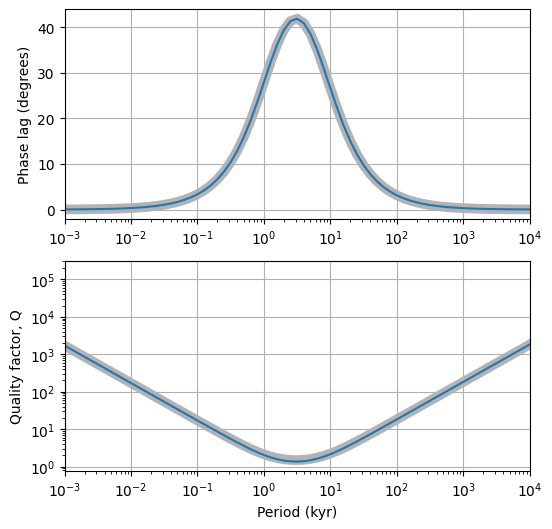

In [15]:
# Plot phase lag and quality factor for a periodic tidal load as a function of the
# forcing period and compare them with reference LNs from analytical formulas
# for the Kelvin Sphere

phi = -np.arctan( np.imag(hc2[0,:]) / np.real(hc2[0,:]) )
q   = 1/phi

r2d = 180 / np.pi

fig, (ax1, ax2) = plt.subplots(2, figsize=(6,6))

ax1.semilogx(t_ref, phi_ref*r2d, color=c_ref, linewidth=lw_ref )
ax1.semilogx(t, phi*r2d )
ax1.set_xlim(1e-3, 1e4)
ax1.grid()
ax1.set_ylabel('Phase lag (degrees)')

ax2.semilogx(t_ref, q_ref, color=c_ref, linewidth=lw_ref )
ax2.loglog(t, q)
ax2.set_xlim(1e-3, 1e4)
ax2.grid()
ax2.set_ylabel('Quality factor, Q')
ax2.set_xlabel('Period (kyr)')

Text(0, 0.5, 'Imaginary part')

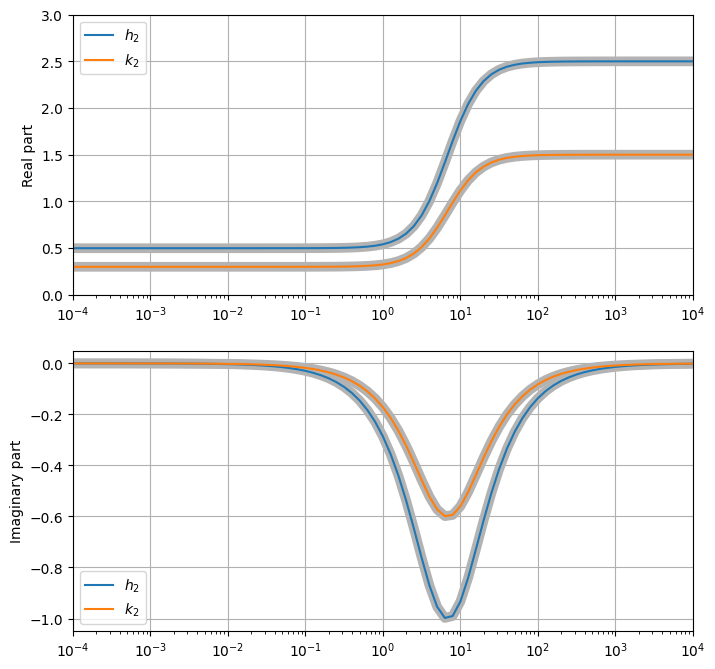

In [16]:
# Plot Re(LN) and Im(LN) for a periodic tidal load as a function of the
# forcing period and compare them with reference LNs from analytical formulas
# for the Kelvin Sphere

fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))

ax1.semilogx(t_ref, h2r_ref, color=c_ref, linewidth=lw_ref)
ax1.semilogx(t_ref, k2r_ref, color=c_ref, linewidth=lw_ref)
ax1.semilogx(t, np.real(hc2[0,:]), label='$h_2$')
ax1.semilogx(t, np.real(kc2[0,:]), label='$k_2$')
ax1.set_xlim(1e-4, 1e4)
ax1.grid()
ax1.legend()
ax1.set_ylabel('Real part')
ax1.set_ylim(0,3)

ax2.semilogx(t_ref, h2i_ref, color=c_ref, linewidth=lw_ref)
ax2.semilogx(t_ref, k2i_ref, color=c_ref, linewidth=lw_ref)
ax2.semilogx(t, np.imag(hc2[0,:]), label='$h_2$')
ax2.semilogx(t, np.imag(kc2[0,:]), label='$k_2$')
ax2.set_xlim(1e-4, 1e4)
ax2.grid()
ax2.legend()
ax2.set_ylabel('Imaginary part')
#ax2.set_ylim(0,3)